### [Linear System Solvers](https://scipy-lectures.org/advanced/scipy_sparse/solvers.html)

- sparse matrix/eigenvalue problem solvers live in ‍‍‍‍`scipy.sparse.linalg`

- the submodules:
    - `dsolve`: direct factorization methods for solving linear systems
    - `isolve`: iterative methods for solving linear systems
    - `eigen`: sparse eigenvalue problem solvers


In [1]:
import scipy.sparse.linalg as spla
spla.__all__

['ArpackError',
 'ArpackNoConvergence',
 'LinearOperator',
 'MatrixRankWarning',
 'SuperLU',
 'arpack',
 'aslinearoperator',
 'bicg',
 'bicgstab',
 'cg',
 'cgs',
 'dsolve',
 'eigen',
 'eigs',
 'eigsh',
 'expm',
 'expm_multiply',
 'factorized',
 'gcrotmk',
 'gmres',
 'interface',
 'inv',
 'isolve',
 'iterative',
 'lgmres',
 'linsolve',
 'lobpcg',
 'lsmr',
 'lsqr',
 'matfuncs',
 'minres',
 'norm',
 'onenormest',
 'qmr',
 'spilu',
 'splu',
 'spsolve',
 'spsolve_triangular',
 'svds',
 'use_solver',
 'utils']

### Sparse Direct Solvers

- default solver: SuperLU 4.0
    - included in SciPy
    - real and complex systems
    - both single and double precision
- optional: umfpack
    - real and complex systems
    - double precision only
    - recommended for performance
    - wrappers now live in `scikits.umfpack`
    - check-out the new `scikits.suitesparse` by Nathaniel Smith


In [2]:
from scipy.sparse.linalg import dsolve
help(dsolve)

Help on package scipy.sparse.linalg.dsolve in scipy.sparse.linalg:

NAME
    scipy.sparse.linalg.dsolve

DESCRIPTION
    Linear Solvers
    
    The default solver is SuperLU (included in the scipy distribution),
    which can solve real or complex linear systems in both single and
    double precisions.  It is automatically replaced by UMFPACK, if
    available.  Note that UMFPACK works in double precision only, so
    switch it off by::
    
        >>> use_solver(useUmfpack=False)
    
    to solve in the single precision. See also use_solver documentation.
    
    Example session::
    
        >>> from scipy.sparse import csc_matrix, spdiags
        >>> from numpy import array
        >>> from scipy.sparse.linalg import spsolve, use_solver
        >>>
        >>> print("Inverting a sparse linear system:")
        >>> print("The sparse matrix (constructed from diagonals):")
        >>> a = spdiags([[1, 2, 3, 4, 5], [6, 5, 8, 9, 10]], [0, 1], 5, 5)
        >>> b = array([1, 2, 3, 4

In [7]:
import numpy as np 
from scipy import sparse
from scipy.sparse import csc_matrix, csr_matrix

mtx = sparse.spdiags([
    [1, 2, 3, 4, 5], 
    [6, 5, 8, 9, 10]], 
    [0, 1], 5, 5)
mtx = csc_matrix(mtx)
print(mtx.todense())
rhs = np.array([1, 2, 3, 4, 5], dtype=np.float32)

[[ 1  5  0  0  0]
 [ 0  2  8  0  0]
 [ 0  0  3  9  0]
 [ 0  0  0  4 10]
 [ 0  0  0  0  5]]


solve as single precision real:

In [9]:
mtx1 = mtx.astype(np.float32)
x = dsolve.spsolve(mtx1, rhs, use_umfpack=False)
print(x)  
print("Error: %s" % (mtx1 * x - rhs))  

[106.  -21.    5.5  -1.5   1. ]
Error: [0. 0. 0. 0. 0.]


solve as double precision real:

In [10]:
mtx2 = mtx.astype(np.float64)
x = dsolve.spsolve(mtx2, rhs, use_umfpack=True)
print(x)  
print("Error: %s" % (mtx2 * x - rhs))  

[106.  -21.    5.5  -1.5   1. ]
Error: [0. 0. 0. 0. 0.]


solve as single precision complex:

In [11]:
mtx1 = mtx.astype(np.complex64)
x = dsolve.spsolve(mtx1, rhs, use_umfpack=False)
print(x)  
print("Error: %s" % (mtx1 * x - rhs))  

[106. -0.j -21. +0.j   5.5-0.j  -1.5+0.j   1. +0.j]
Error: [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]


solve as double precision complex:

In [12]:
mtx2 = mtx.astype(np.complex128)
x = dsolve.spsolve(mtx2, rhs, use_umfpack=True)
print(x)
print("Error: %s" % (mtx2 * x - rhs))

[106. -0.j -21. +0.j   5.5-0.j  -1.5+0.j   1. +0.j]
Error: [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]


Solve a linear system
=======================

Construct a 1000x1000 `lil_matrix` and add some values to it, convert it
to CSR format and solve `A x = b` for `x` and solve a linear system with a
direct solver.

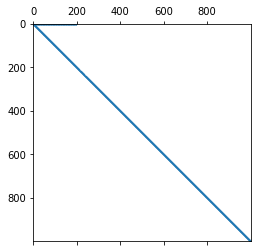

rezidual: 5.626372536873159e-14


In [22]:
import numpy as np
import scipy.sparse as sps
from matplotlib import pyplot as plt
from scipy.sparse.linalg.dsolve import linsolve

n = 1000
rand = np.random.rand
mtx = sps.lil_matrix((n, n), dtype=np.float64)
mtx[0, :n//10] = rand(n//10)
mtx[1, n//10: n//5] = mtx[0, :n//10]
mtx.setdiag(rand(n))

plt.clf()
plt.spy(mtx, marker='.', markersize=1)
plt.show()

mtx = mtx.tocsr()
rhs = rand(n)

x = linsolve.spsolve(mtx, rhs)

print('rezidual: %r' % np.linalg.norm(mtx * x - rhs))

### Iterative Solvers

- the isolve module contains the following solvers:
    - `bicg` (BIConjugate Gradient)
    - `bicgstab` (BIConjugate Gradient STABilized)
    - `cg` (Conjugate Gradient) - symmetric positive definite matrices only
    - `cgs` (Conjugate Gradient Squared)
    - `gmres` (Generalized Minimal RESidual)
    - `minres` (MINimum RESidual)
    - `qmr` (Quasi-Minimal Residual)

### A Few Notes on Preconditioning
- problem specific
- often hard to develop
- if not sure, try ILU
    - available in `dsolve` as `spilu()`

[scipy.sparse.linalg.spilu](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.spilu.html)
- Compute an incomplete LU decomposition for a sparse, square matrix.

In [30]:
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import spilu
A = csc_matrix([
    [1., 0., 0.], 
    [5., 0., 2.], 
    [0., -1., 0.]], 
    dtype=float)
B = spilu(A)
b = np.array([1., 2., 3.], dtype=float)
print(B.solve(b))
print(A.dot(B.solve(b)))
print(B.solve(A.dot(b)))

[ 1.  -3.  -1.5]
[1. 2. 3.]
[1. 2. 3.]


[Linear Algebra (scipy.linalg)](https://docs.scipy.org/doc/scipy/reference/tutorial/linalg.html)

In [31]:
A = np.array([
    [1., 0., 0.], 
    [5., 0., 2.], 
    [0., -1., 0.]], 
    dtype=float)
b = np.array([1., 2., 3.])
print(np.linalg.solve(A, b))

[ 1.  -3.  -1.5]
